In [9]:
import pandas_datareader as pd_dr
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pd_dr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [11]:
start_date = '1926-01-01'
ff = pd_dr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start_date).read()
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-05   -0.34 -1.85  8.41  0.03
 2022-06   -8.43  2.09 -5.97  0.06
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.78  1.39  0.31  0.19
 2022-09   -9.36 -0.81  0.05  0.19
 
 [1155 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

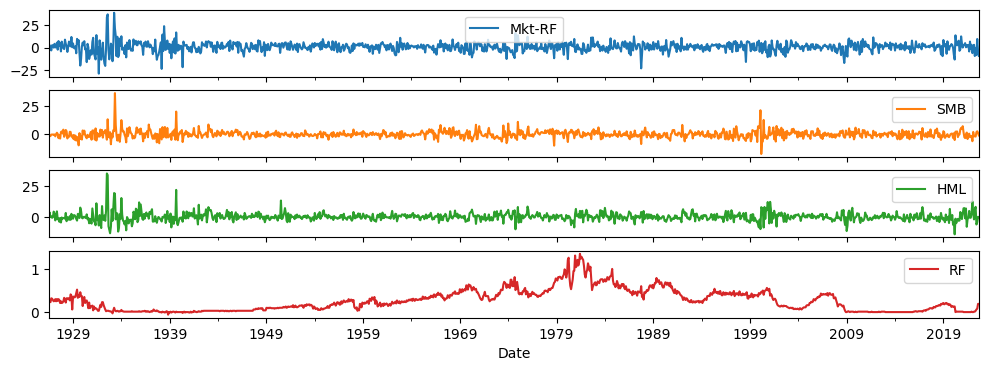

In [12]:
ff_df = ff[0]
ff_df.plot(subplots=True,figsize=(12,4))

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

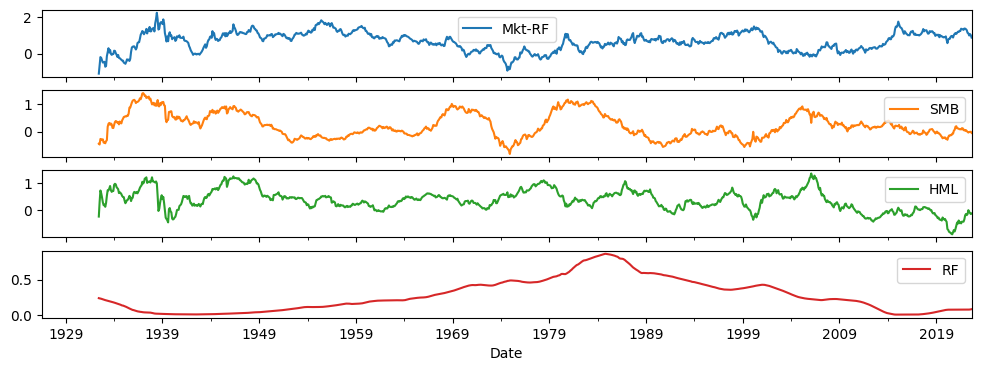

In [13]:
#smooth out by taking a rolling avg of 72 months
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [14]:
ff_mom_df = pd_dr.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start_date).read()[0]
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2022-05,2.48
2022-06,0.79
2022-07,-3.96


array([<AxesSubplot: xlabel='Date'>], dtype=object)

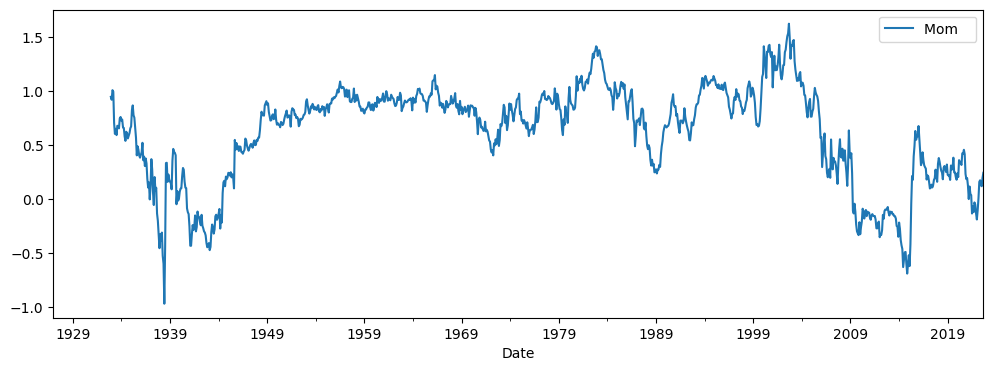

In [15]:
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [20]:
ffac_merged_df = pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False)
ffac_merged_df[:]

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-05,-0.34,-1.85,8.41,0.03,2.48
2022-06,-8.43,2.09,-5.97,0.06,0.79
2022-07,9.57,2.81,-4.10,0.08,-3.96


In [30]:
AAPL_data = pd_dr.data.get_data_yahoo('AAPL',start=start_date)['Adj Close'].resample('M').ffill().pct_change()
AAPL_df = AAPL_data.to_frame()
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2022-07-31,0.188634
2022-08-31,-0.031208
2022-09-30,-0.120977


In [31]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [32]:
ffac_merged_df.index.dtype

period[M]

In [35]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')
AAPL_df['dt_date'].dtype

dtype('O')

In [36]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df['dt_date'].dtype

dtype('O')

In [38]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom,str_date,dt_date
Date,,,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36,1927-01,1927-01
1927-02,4.18,0.04,2.94,0.26,-2.14,1927-02,1927-02
1927-03,0.13,-1.65,-2.61,0.30,3.61,1927-03,1927-03
1927-04,0.46,0.30,0.81,0.25,4.30,1927-04,1927-04
1927-05,5.44,1.53,4.73,0.30,3.00,1927-05,1927-05
...,...,...,...,...,...,...,...
2022-05,-0.34,-1.85,8.41,0.03,2.48,2022-05,2022-05
2022-06,-8.43,2.09,-5.97,0.06,0.79,2022-06,2022-06
2022-07,9.57,2.81,-4.10,0.08,-3.96,2022-07,2022-07


In [50]:
AAPL_ffac_merged_df = pd.merge(AAPL_df, ffac_merged_df, how='inner', on='dt_date', sort=True, copy=True, indicator=True, validate = 'one_to_one')
AAPL_ffac_merged_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y,_merge
0,NaN,1980-12-31,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12,both
1,-0.172163,1981-01-31,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01,both
2,-0.061943,1981-02-28,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02,both
3,-0.075475,1981-03-31,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03,both
4,0.158162,1981-04-30,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04,both
...,...,...,...,...,...,...,...,...,...,...
497,-0.054496,2022-05-31,2022-05,-0.34,-1.85,8.41,0.03,2.48,2022-05,both
498,-0.081430,2022-06-30,2022-06,-8.43,2.09,-5.97,0.06,0.79,2022-06,both
499,0.188634,2022-07-31,2022-07,9.57,2.81,-4.10,0.08,-3.96,2022-07,both
500,-0.031208,2022-08-31,2022-08,-3.78,1.39,0.31,0.19,2.10,2022-08,both


In [51]:
AAPL_ffac_merged_df.drop(columns = ['str_date_x','str_date_y'],inplace=True)
AAPL_ffac_merged_df.rename(columns = {'Adj Close':'AAPL'},inplace=True)
AAPL_ffac_merged_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,_merge
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,both
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,both
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,both
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,both
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,both
...,...,...,...,...,...,...,...,...
497,-0.054496,2022-05,-0.34,-1.85,8.41,0.03,2.48,both
498,-0.081430,2022-06,-8.43,2.09,-5.97,0.06,0.79,both
499,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,both
500,-0.031208,2022-08,-3.78,1.39,0.31,0.19,2.10,both


In [52]:
AAPL_ffac_merged_df['AAPL_RF'] = AAPL_ffac_merged_df['AAPL']*100 - AAPL_ffac_merged_df['RF']
AAPL_ffac_merged_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,_merge,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,both,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,both,-18.256282
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,both,-7.264314
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,both,-8.757468
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,both,14.736201
...,...,...,...,...,...,...,...,...,...
497,-0.054496,2022-05,-0.34,-1.85,8.41,0.03,2.48,both,-5.479597
498,-0.081430,2022-06,-8.43,2.09,-5.97,0.06,0.79,both,-8.202973
499,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,18.783362
500,-0.031208,2022-08,-3.78,1.39,0.31,0.19,2.10,both,-3.310796


In [53]:
AAPL_ffac_merged_df.dropna(axis=0,inplace=True)
AAPL_ffac_merged_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,_merge,AAPL_RF
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,both,-18.256282
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,both,-7.264314
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,both,-8.757468
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,both,14.736201
5,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,both,15.589771
...,...,...,...,...,...,...,...,...,...
497,-0.054496,2022-05,-0.34,-1.85,8.41,0.03,2.48,both,-5.479597
498,-0.081430,2022-06,-8.43,2.09,-5.97,0.06,0.79,both,-8.202973
499,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,18.783362
500,-0.031208,2022-08,-3.78,1.39,0.31,0.19,2.10,both,-3.310796


In [55]:
AAPL_ffac_merged_df.rename(columns = {'Mom   ':'MOM'},inplace=True)
list(AAPL_ffac_merged_df)

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'MOM', '_merge', 'AAPL_RF']

In [57]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merged_df['AAPL_RF'], AAPL_ffac_merged_df[['Mkt-RF', 'SMB', 'HML', 'MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              50.68
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                    8.86e-36
Time:                        02:35:43   Log-Likelihood:                         -1912.9
No. Observations:                 501   AIC:                                      3834.
Df Residuals:                     497   BIC:                                      3851.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2674      0.116     10.910      0.000       1.039       1.496
SMB            0.2232      0.173      1.287      0.199      -0.117       0.564
HML           -0.8407      0.170     -4.958      0.000      -1.174      -0.508
MOM           -0.0564      0.118     -0.478      0.633      -0.288       0.176
==============================================================================
Omnibus:                       14.652   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.978
Skew:                          -0.059   Prob(JB):                     3.09e-07
Kurtosis:                       4.193   Cond. No.                         1.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
import statsmodels.tools
AAPL_ffac_merged_df_const = statsmodels.tools.add_constant(AAPL_ffac_merged_df, prepend=True)
AAPL_ffac_merged_df_const

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,_merge,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,both,-18.256282
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,both,-7.264314
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,both,-8.757468
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,both,14.736201
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,both,15.589771
...,...,...,...,...,...,...,...,...,...,...
497,1.0,-0.054496,2022-05,-0.34,-1.85,8.41,0.03,2.48,both,-5.479597
498,1.0,-0.081430,2022-06,-8.43,2.09,-5.97,0.06,0.79,both,-8.202973
499,1.0,0.188634,2022-07,9.57,2.81,-4.10,0.08,-3.96,both,18.783362
500,1.0,-0.031208,2022-08,-3.78,1.39,0.31,0.19,2.10,both,-3.310796


In [59]:
results = OLS(AAPL_ffac_merged_df_const['AAPL_RF'], AAPL_ffac_merged_df_const[['const','Mkt-RF', 'SMB', 'HML', 'MOM']],missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     49.56
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.35e-35
Time:                        02:43:21   Log-Likelihood:                -1908.7
No. Observations:                 501   AIC:                             3827.
Df Residuals:                     496   BIC:                             3848.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4735      0.508      2.902      0.004       0.476       2.471
Mkt-RF         1.1996      0.118     10.197      0.000       0.968       1.431
SMB            0.2154      0.172      1.251      0.212      -0.123       0.554
HML           -0.9217      0.171     -5.403      0.000      -1.257      -0.586
MOM           -0.1199      0.119     -1.006      0.315      -0.354       0.114
==============================================================================
Omnibus:                       13.886   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.626
Skew:                          -0.056   Prob(JB):                     1.00e-06
Kurtosis:                       4.145   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""